## Theoretical

1. What is Boosting in Machine Learning?

Boosting is an ensemble learning technique that combines multiple weak learners (usually decision trees) to create a strong learner. It sequentially trains models, where each model corrects the errors of the previous one.

2. How does Boosting differ from Bagging?

Boosting trains weak models sequentially, adjusting weights for misclassified instances, whereas Bagging trains models independently in parallel and aggregates their predictions.

3. What is the key idea behind AdaBoost?

AdaBoost (Adaptive Boosting) assigns weights to data points, focusing more on misclassified samples, and combines weak classifiers iteratively to form a strong classifier.

4. Explain the working of AdaBoost with an example.

In AdaBoost, a weak model (e.g., decision stump) is trained, and misclassified samples receive higher weights. The process is repeated for multiple iterations, combining models to improve accuracy. Example: Classifying spam emails by sequentially improving classifiers.

5. What is Gradient Boosting, and how is it different from AdaBoost?

Gradient Boosting builds models sequentially, minimizing residual errors using gradient descent. Unlike AdaBoost, which adjusts sample weights, Gradient Boosting optimizes a differentiable loss function.

6. What is the loss function in Gradient Boosting?

The loss function depends on the task:
Regression: Mean Squared Error (MSE)
Classification: Log Loss (Cross-Entropy)

7. How does XGBoost improve over traditional Gradient Boosting?

XGBoost (Extreme Gradient Boosting) improves efficiency with:
Regularization (L1 & L2)
Tree pruning
Parallel processing
Handling missing values efficiently

8. What is the difference between XGBoost and CatBoost?

XGBoost supports general tabular data, while CatBoost is optimized for categorical features using an advanced encoding mechanism.

9. What are some real-world applications of Boosting techniques?

Fraud detection, customer churn prediction, credit scoring, medical diagnosis, and recommendation systems.

10. How does regularization help in XGBoost?

Regularization (L1 & L2) prevents overfitting by penalizing complex models and reducing model variance.

11. What are some hyperparameters to tune in Gradient Boosting models?


Learning rate, number of estimators, max depth, min child weight, gamma, and subsample ratio.

12. What is the concept of Feature Importance in Boosting?

Boosting assigns scores to features based on their contribution to splits in decision trees, helping in feature selection.

13. Why is CatBoost efficient for categorical data?

CatBoost uses an ordered boosting technique and efficient categorical encoding (target-based encoding) to handle categorical variables without one-hot encoding.

## Practical

14. Train an AdaBoost Classifier on a sample dataset and print model accuracy

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostClassifier(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.875


15. Train an AdaBoost Regressor and evaluate performance using Mean Absolute Error (MAE)

In [2]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = AdaBoostRegressor(n_estimators=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 47.73130500944537


16. Train a Gradient Boosting Classifier on the Breast Cancer dataset and print feature importance

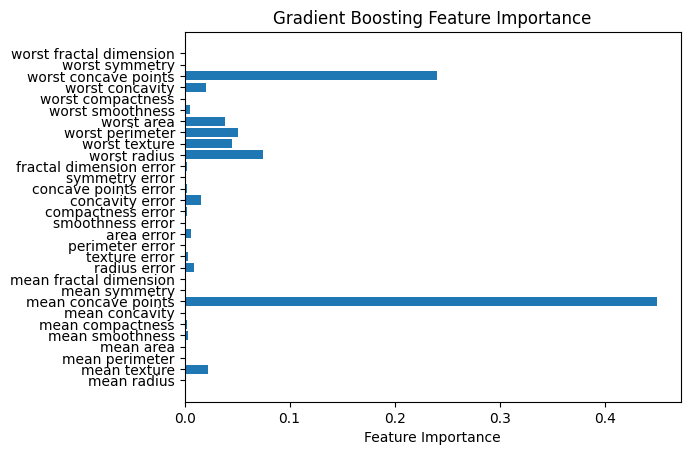

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)

plt.barh(data.feature_names, model.feature_importances_)
plt.xlabel("Feature Importance")
plt.title("Gradient Boosting Feature Importance")
plt.show()


17. Train a Gradient Boosting Regressor and evaluate using R-Squared Score

In [4]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

model = GradientBoostingRegressor(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-Squared Score:", r2_score(y_test, y_pred))



R-Squared Score: 0.870008363105027


18. Train an XGBoost Classifier on a dataset and compare accuracy with Gradient Boosting

In [5]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:05:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.956140350877193
Gradient Boosting Accuracy: 0.956140350877193


19. Train a CatBoost Classifier and evaluate using F1-Score

In [10]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [11]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score

cat_model = CatBoostClassifier(iterations=100, verbose=0)
cat_model.fit(X_train, y_train)
cat_pred = cat_model.predict(X_test)
print("F1-Score:", f1_score(y_test, cat_pred))


F1-Score: 0.9722222222222222


20. Train an XGBoost Regressor and evaluate using Mean Squared Error (MSE)

In [12]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_reg = XGBRegressor(n_estimators=100)
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 0.04869866371154785


21. Train an AdaBoost Classifier and visualize feature importance

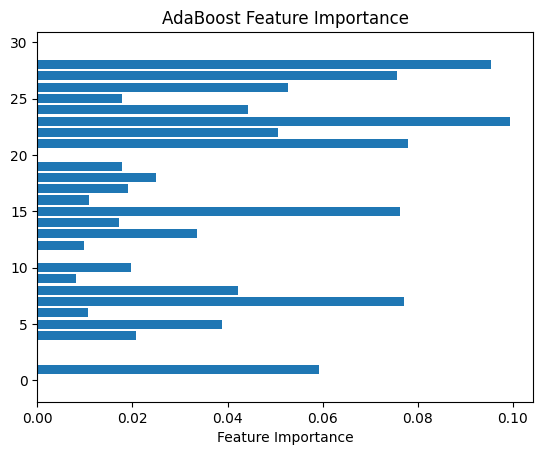

In [13]:
import numpy as np

model = AdaBoostClassifier(n_estimators=100)
model.fit(X_train, y_train)
importances = model.feature_importances_

plt.barh(np.arange(len(importances)), importances)
plt.xlabel("Feature Importance")
plt.title("AdaBoost Feature Importance")
plt.show()




22. Train a Gradient Boosting Regressor and plot learning curves






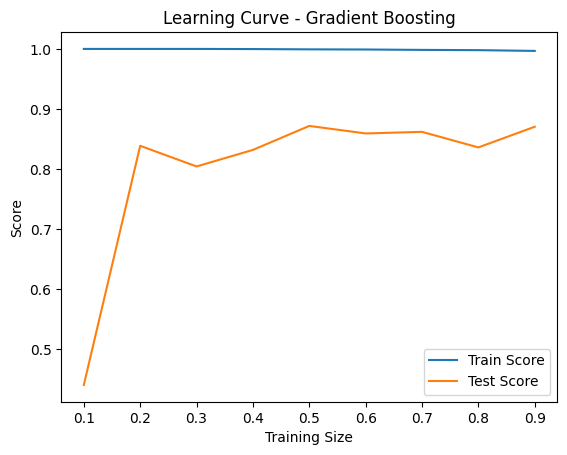

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Adjust train_sizes to exclude 1.0
train_sizes = np.linspace(0.1, 0.9, 9)  # Changed to 0.9 to exclude 1.0
train_scores, test_scores = [], []

for size in train_sizes:
    X_subtrain, _, y_subtrain, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)
    model = GradientBoostingRegressor(n_estimators=100)
    model.fit(X_subtrain, y_subtrain)
    train_scores.append(model.score(X_subtrain, y_subtrain))
    test_scores.append(model.score(X_test, y_test))

plt.plot(train_sizes, train_scores, label="Train Score")
plt.plot(train_sizes, test_scores, label="Test Score")
plt.xlabel("Training Size")
plt.ylabel("Score")
plt.legend()
plt.title("Learning Curve - Gradient Boosting")
plt.show()

23. Train an XGBoost Classifier and visualize feature importance

<Figure size 1000x500 with 0 Axes>

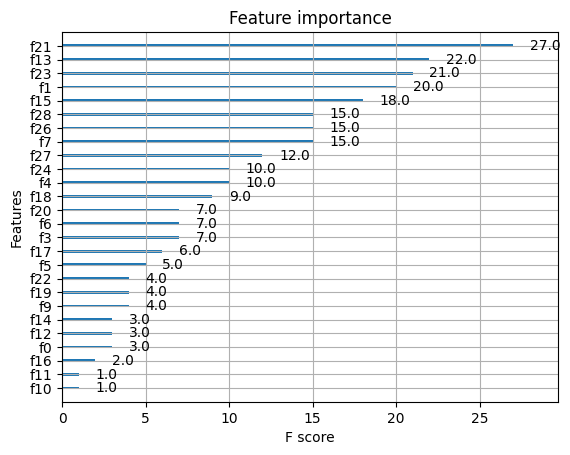

In [16]:
from xgboost import plot_importance

xgb_model = XGBClassifier(n_estimators=100)
xgb_model.fit(X_train, y_train)

plt.figure(figsize=(10, 5))
plot_importance(xgb_model)
plt.show()


24. Train a CatBoost Classifier and plot the confusion matrix

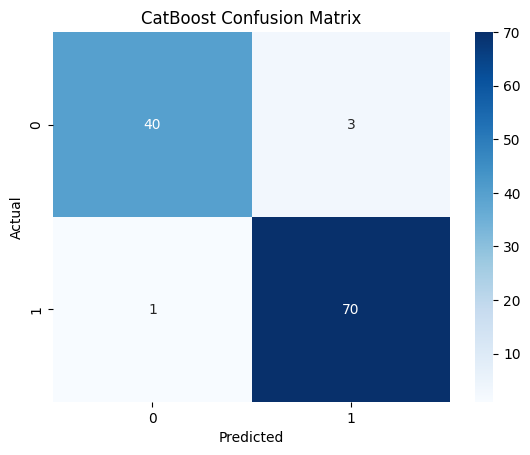

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cat_model = CatBoostClassifier(iterations=100, verbose=0)
cat_model.fit(X_train, y_train)
y_pred = cat_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Confusion Matrix")
plt.show()


25. Train an AdaBoost Classifier with different numbers of estimators and compare accuracy

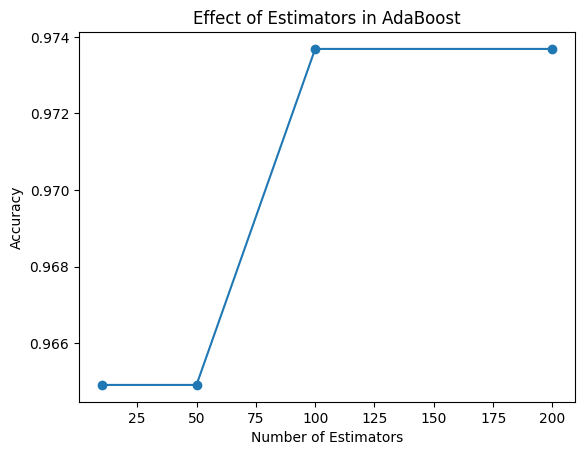

In [18]:
estimators = [10, 50, 100, 200]
scores = []

for n in estimators:
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.plot(estimators, scores, marker='o')
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.title("Effect of Estimators in AdaBoost")
plt.show()


26. Train a Gradient Boosting Classifier and visualize the ROC curve




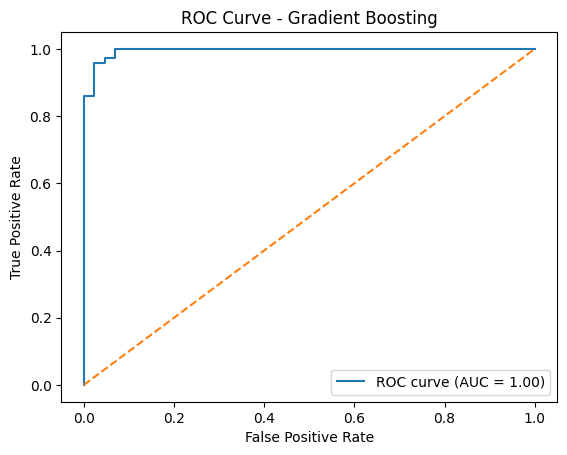

In [19]:
from sklearn.metrics import roc_curve, auc

model = GradientBoostingClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting")
plt.legend()
plt.show()


27. Train an XGBoost Regressor and tune learning rate using GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {"learning_rate": [0.01, 0.1, 0.2, 0.3]}
grid_search = GridSearchCV(XGBRegressor(n_estimators=100), param_grid, scoring="r2", cv=3)
grid_search.fit(X_train, y_train)

print("Best Learning Rate:", grid_search.best_params_)


Best Learning Rate: {'learning_rate': 0.3}


28. Train a CatBoost Classifier on an imbalanced dataset and compare performance with class weighting

In [21]:
from sklearn.utils import compute_class_weight
import numpy as np

class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: w for i, w in enumerate(class_weights)}

cat_model = CatBoostClassifier(iterations=100, class_weights=class_weights_dict, verbose=0)
cat_model.fit(X_train, y_train)
print("Accuracy:", cat_model.score(X_test, y_test))


Accuracy: 0.9736842105263158


29. Train an AdaBoost Classifier and analyze the effect of different learning rates



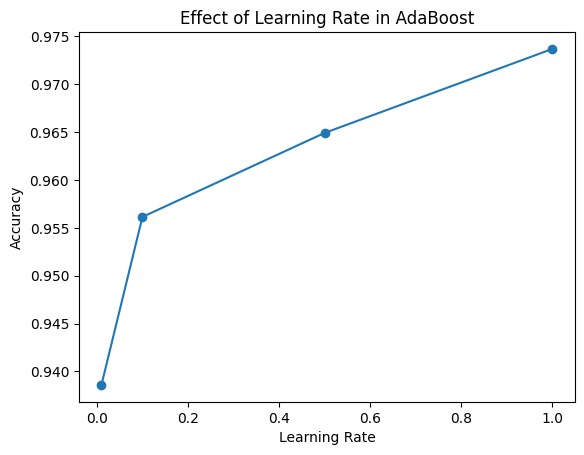

In [22]:
learning_rates = [0.01, 0.1, 0.5, 1]
scores = []

for lr in learning_rates:
    model = AdaBoostClassifier(n_estimators=100, learning_rate=lr)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.plot(learning_rates, scores, marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.title("Effect of Learning Rate in AdaBoost")
plt.show()



30. Train an XGBoost Classifier for multi-class classification and evaluate using log-loss

In [23]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import log_loss

X, y = make_classification(n_samples=1000, n_classes=3, n_informative=5, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = XGBClassifier(n_estimators=100, objective="multi:softprob")
xgb_model.fit(X_train, y_train)

y_proba = xgb_model.predict_proba(X_test)
print("Log-Loss:", log_loss(y_test, y_proba))


Log-Loss: 0.42837528138155884
